# Phase 3 Project

# **SyriaTel Customer Churn Prediction**

**Author** - [Neville Ngenzi](https://github.com/NgenziNevilleMativo)

----

# Introduction

## Overview

The telecommunication industry plays a crucial role in our daily lives, with media transmission being a standout amongst the most developing sectors. Operators need to find and execute new methods to remain at the forefront of this growth.

While acquiring new customers is important, telecommunication companies recognize that retaining existing ones is even more crucial. Customer churn, is defined as the rate at which subscribers switch to competitors, is a major concern in this industry.

Customer churn prediction or churn analysis involves using data mining techniques to identify patterns in customer data that can predict churn. Techniques like hybrid models, decision trees, and Bayesian applications have been employed to address this challenge. This study focuses on developing a hybrid predictive model for churn prediction and feature selection, enabling service providers to predict customer churn propensity and eliminate reliance on traditional methods like questionnaires.

The project is structured as follows:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Exploratory Data Analysis
5. Modelling
6. Model Evaluation
7. Recommendations and Conclusions

 ## 1. Business Understanding

### Business problem
Customer churn, is the rate at which customers discontinue their services with a company, poses a significant challenge for telecom companies like SyriaTel. This issue impacts revenue, marketing expenses, and brand perception. For SyriaTel specifically, customer churn directly affects financial stability and market standing. Losing customers not only reduces immediate income but also escalates the expenses associated with acquiring new ones. 

Additionally, high churn rates can tarnish SyriaTel's reputation, making it harder to attract new clients. Given the fierce competition in the telecom sector, understanding the reasons behind customer departures, whether related to pricing, service quality, customer experience, or competitor tactics, is crucial. This comprehension enables SyriaTel to identify and rectify underlying problems, ultimately mitigating further churn and fostering long-term profitability and customer loyalty.

### Objectives

- To create a machine learning model that accurately predicts customer churn by analyzing relevant features in the dataset and training the model to classify customers as either likely to churn or not. (Building a predictive model)

- Identify key factors that significantly contribute to predicting customer churn. (Feature Importance)

- To utilize the created model to estimate the likelihood of customer churn.(Predicting Churn Probability)

 ## 2. Data Understanding

The dataset titled "Churn in Telecom" sourced from Kaggle [dataset,](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) provides details on customer activity, specifically whether they have terminated their subscription with the telecom company. The primary aim of this dataset is to construct predictive models that aid the telecom industry in minimizing financial losses attributed to short-term customer retention. 

Data understanding is dedicated to familiarize with the dataset and identifying potential data quality issues. Additionally, initial exploratory data analysis will be conducted to uncover initial insights into the dataset's characteristics.

In [553]:
# Import modules and Packages

# Data Handling and Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Filter future Warnings
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

# Model Training and Evaluation
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight

from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [554]:
# Load the data into panda dataframe
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

# Previewing the first few rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [555]:
# Number of Rows and Columns
df.shape

(3333, 21)

In [556]:
# Number of Elements in Dataframe
df.size

69993

In [557]:
# General Overview of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

This dataset comprises of 3333 data records and 21 columns. However, a thorough examination of each column is necessary to detect anomalies, particularly those in the form of placeholder values or unique characters. 

Among the columns, four (4) are categorized as objects, eight (8) as integers, eight (8) as floats, and one (1) as boolean. The column designated as "churn" serves as our `target variable`, while the remaining columns are treated as `features`. This dataset offers a diverse range of information, encompassing customer demographics, service plans, call metrics, and churn indicators.

Based on the general information provided above, it is observed that the majority of column names consist of two or more words. To enhance accessibility, it is imperative to eliminate the white spaces within the column names. Thus, we must proceed with renaming the columns by replacing white spaces with underscores '_' for improved readability and usability.

In [558]:
# Rename column titles to replace spaces with underscores
modified_columns = [col.replace(' ', '_') for col in df.columns]

# Update DataFrame with modified column names
df.columns = modified_columns

# Display the updated column names
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [559]:
# Numerical Columns
numerical_columns = df.select_dtypes(include='number').columns
print(f"Numerical Columns: {numerical_columns}\n")

# Categorical Columns
categorical_columns = df.select_dtypes(include='object').columns
print(f"Categorical Columns: {categorical_columns}")

Numerical Columns: Index(['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls'],
      dtype='object')

Categorical Columns: Index(['state', 'phone_number', 'international_plan', 'voice_mail_plan'], dtype='object')


In [560]:
# General statistics of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area_code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number_vmail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total_day_minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total_day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total_day_charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total_eve_minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total_eve_calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total_eve_charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total_night_minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


Summary of Features in the Datset

Numerical Columns:
- `Account Length`: The duration (in days) that the customer has held the account.
- `Area Code`: The geographic area code associated with the customer's phone number.
- `Number Vmail Messages`: The total count of voicemail messages sent by the customer.
- `Total Day Minutes`: The total duration (in minutes) of calls made by the customer during the day.
- `Total Day Calls`: The total number of calls made by the customer during the day.
- `Total Day Charge`: The total cost incurred by the customer for calls made during the day.
- `Total Eve Minutes`: The total duration (in minutes) of calls made by the customer during the evening.
- `Total Eve Calls`: The total number of calls made by the customer during the evening.
- `Total Eve Charge`: The total cost incurred by the customer for calls made during the evening.
- `Total Night Minutes`: The total duration (in minutes) of calls made by the customer during the night.
- `Total Night Calls`: The total number of calls made by the customer during the night.
- `Total Night Charge`: The total cost incurred by the customer for calls made during the night.
- `Total Intl Minutes`: The total duration (in minutes) of international calls made by the customer.
- `Total Intl Calls`: The total number of international calls made by the customer.
- `Total Intl Charge`: The total cost incurred by the customer for international calls.
- `Customer Service Calls`:  The number of calls made by the customer to customer service.
- `Churn`: Indicates if the customer has terminated their contract (Yes/No).

Categorical Columns:
- `State`: The state of residence for the customer.
- `Phone Number`: The customer's telephone number.
- `International Plan`: Indicates if the customer subscribes to the international calling plan (Yes/No).
- `Voice Mail Plan`: Indicates if the customer subscribes to the voicemail plan (Yes/No).

 ## 3. Data Cleaning

This step involves examining the dataframe for any anomalies. It's essential to thoroughly analyze the data to identify missing values, including placeholder or distinct values.

In [561]:
# Check for missing values (nan) in the dataframe
df.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [562]:
# Check for duplicates in the dataframe
df.duplicated().sum()

0

Given the information provided, it's clear that the dataset lacks any null values or any duplicates, making the need for an imputer unnecessary.

Some columns within the dataset lack meaningful insights into customer behavior, such as the phone number column. Predicting customer churn does not require consideration of phone numbers, rendering this column irrelevant.

In [563]:
# Drop the column labeled "phone number" from the DataFrame.
df.drop(['phone_number'], axis=1, inplace=True)

 ## 4. Exploratory Data Analysis

Exploratory Data Analysis (EDA) involves thoroughly examining the data using various analytical techniques such as univariate, bivariate, and multivariate analysis.

The purpose of this data exploration is to uncover potential correlations among the features and understand the distribution of variables. These insights are crucial for effective feature engineering and model building.

This phase delves into the dataset to uncover patterns, establish connections between variables, spot outliers, and gather insights before employing any modeling or statistical methods.

### 4.1 Univariate EDA

Univariate data analysis focuses on analyzing individual variables. In the project, this entails studying each feature's distribution in the dataset to comprehend its properties and detect any anomalies, such as outliers.

The process is initiated by scrutinizing the target variable column "churn" to understand its distribution. This categorical variable indicates whether a client is likely to churn, denoted by boolean values True and False.

#### 4.1.1 Distribution of the 'churn' Feature

In [564]:
# Calculate the distribution of the 'churn' column
churn_distribution_summary = df['churn'].value_counts()

# Print the churn distribution summary
print("Churn Distribution Summary:")
print(churn_distribution_summary)

Churn Distribution Summary:
False    2850
True      483
Name: churn, dtype: int64


Upon inspection, the presence of 2,850 false values denotes customers who stayed, while 483 true values represent those who left the company.

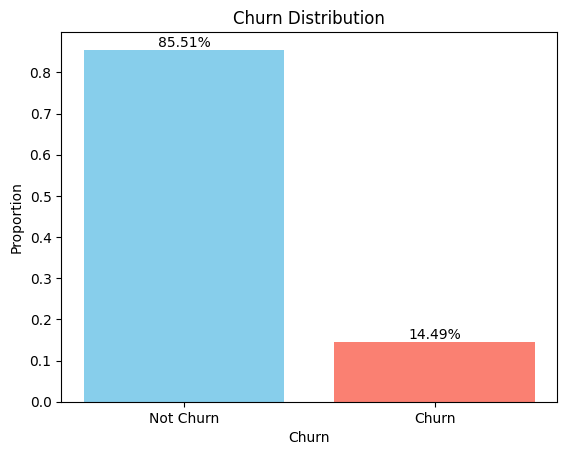

In [565]:
# Calculate churn distribution
churn_distribution = df['churn'].value_counts(normalize=True)

# Plot churn distribution
plt.bar(churn_distribution.index, churn_distribution.values, color=['skyblue', 'salmon'])

# Annotate bars with representative values
for i, value in enumerate(churn_distribution):
    plt.text(i, value, f"{value:.2%}", ha='center', va='bottom')

# Set plot title and labels
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Not Churn', 'Churn'])

# Show plot
plt.show()


This imbalance, underscored by the termination of contracts by 483 customers (14.5% of our base), needs addressing before modeling to prevent inaccurate predictions. Despite no missing values, the class imbalance is evident, with 85.51% in the false class and 14.49% in the true class. Rectifying this imbalance is crucial for accurate modeling.

#### 4.1.2 Distribution of numerical Feature

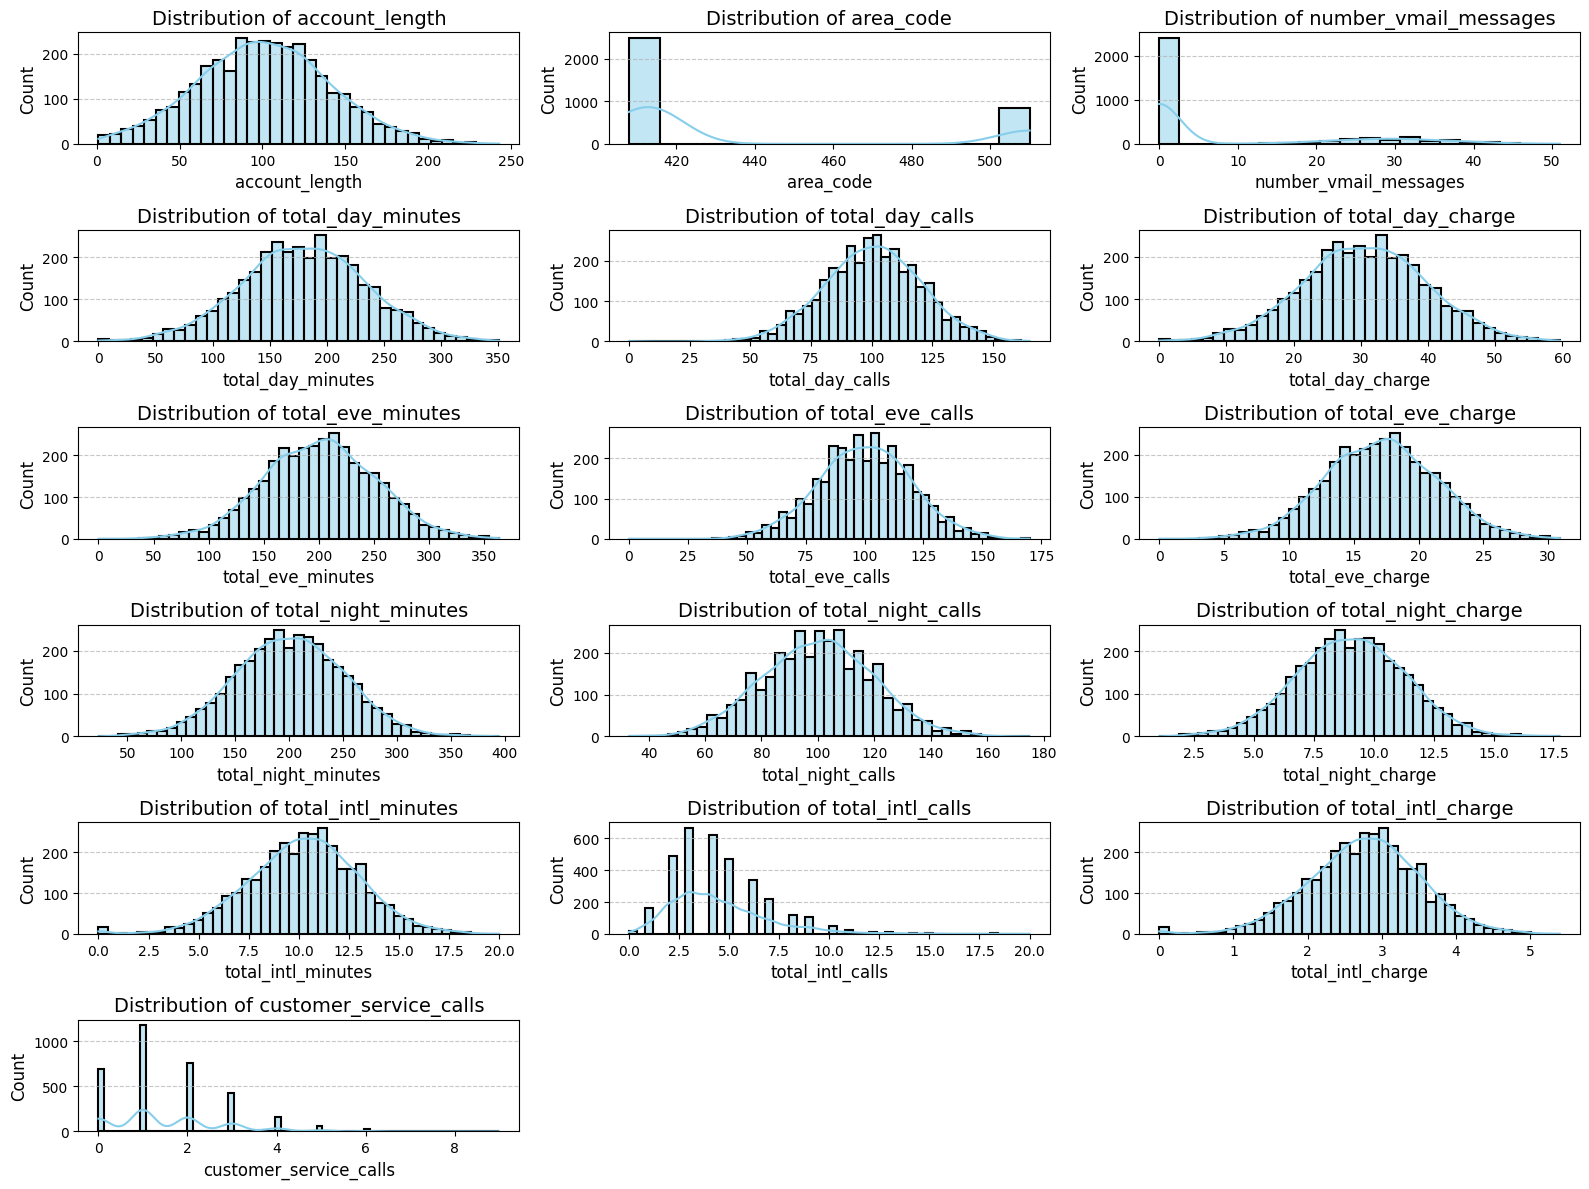

In [566]:
# Retrieve numeric columns
numeric_features = df.select_dtypes(include='number').columns.tolist()

# Determine subplot layout
num_features = len(numeric_features)
rows = (num_features - 1) // 3 + 1
cols = min(3, num_features)

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot numeric features
for ax, feature in zip(axes, numeric_features):
    sns.histplot(df[feature], kde=True, ax=ax, color='skyblue', edgecolor='black', linewidth=1.5)
    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove any excess subplots
for ax in axes[num_features:]:
    fig.delaxes(ax)

# Adjust subplot layout
fig.tight_layout()

# Display the plot
plt.show()

The predictor variables, including account length, total day minutes, total day calls, total eve minutes, total eve calls, total day charge, total eve charge, total night minutes, total night calls, total night charge, and total intl minutes, appear to follow a fairly normal distribution.

Meanwhile, total intl calls and customer service calls exhibit a normal distribution but with a right skew. The area code column is discrete and categorical. Regarding the number of vmail messages, the majority of entries are zero, while the remaining values appear to exhibit a platykurtic distribution.

#### 4.1.3 Distribution of categorical Feature

In [567]:
def plot_categorical_distribution(df, feature):
    """
    Plots the distribution of a categorical feature in the given DataFrame.
    """
    # Set the figure size
    plt.figure(figsize=(11, 7))

    # Create a countplot ordered by the count of each category
    sns.countplot(x=feature, data=df, color='skyblue', order=df[feature].value_counts().index)

    # Set the title of the plot
    plt.title(f'Distribution of {feature}', fontsize=14, fontweight='bold')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Display the plot
    plt.show()


- State

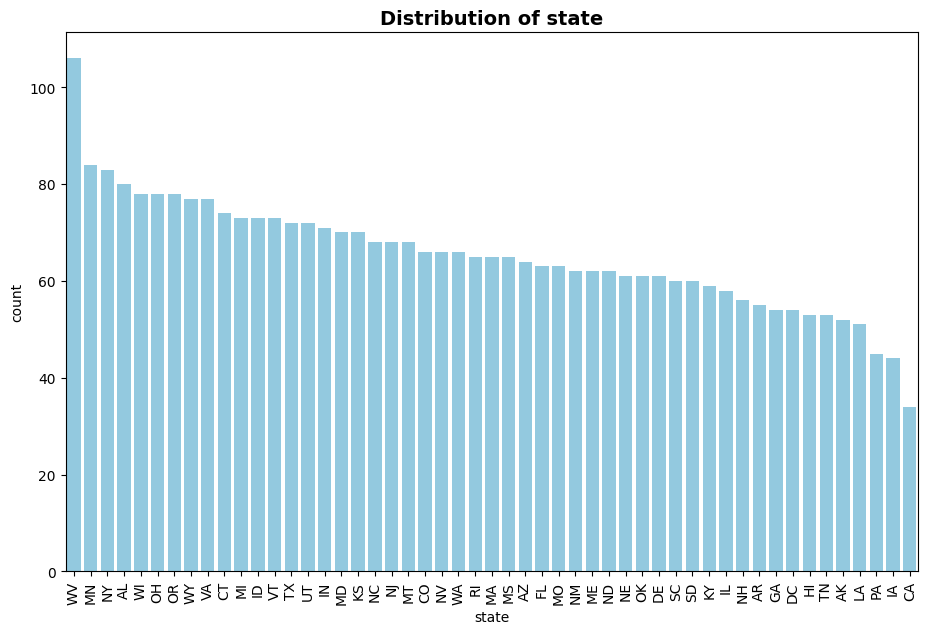

In [568]:
plot_categorical_distribution(df, 'state')

The majority of customers hail from West Virginia, Minnesota, New York, Alabama, and Wisconsin.

- International plan

In [569]:
df['international_plan'].value_counts()

no     3010
yes     323
Name: international_plan, dtype: int64

Based on the observations above, the 'International Plan' column exclusively contains 'yes' and 'no' responses, indicating whether a client has an international plan or not.

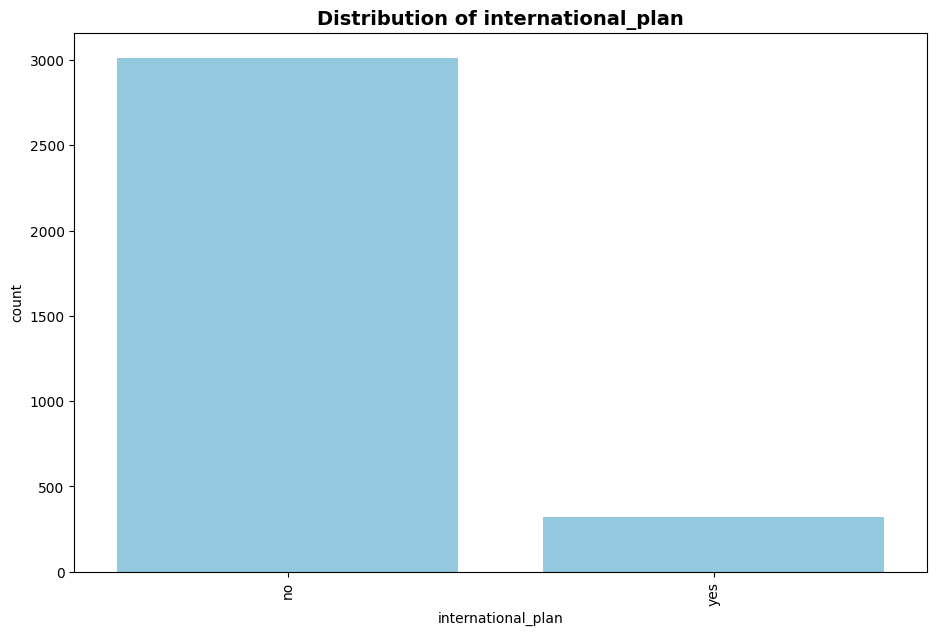

In [570]:
plot_categorical_distribution(df, 'international_plan')

Among the 3333 customers, merely 323 possess an international plan, constituting roughly 0.1% of the total clientele.

- Voicemail plan

Now lets look into the Voice Mail Plan Column. Given this column is of object type same as the international_plan column, we will repeat the same.

In [571]:
df['voice_mail_plan'].value_counts()

no     2411
yes     922
Name: voice_mail_plan, dtype: int64

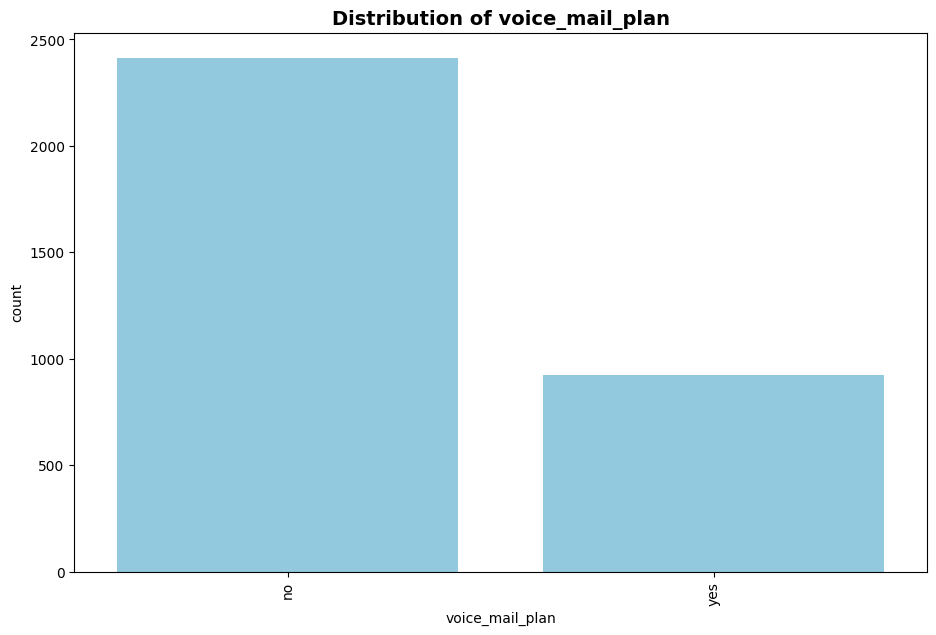

In [572]:
plot_categorical_distribution(df, 'voice_mail_plan')

Among the 3333 customers, merely 922 have opted for a voicemail plan, constituting approximately 0.3% of the total.

#### 4.1.4 Addressing Outliers

Outliers have the potential to disproportionately affect the effectiveness of predictive models, introducing noise and distorting the training process. By excluding outliers that lie beyond 3 standard deviations, we enhance the models' capacity to identify underlying patterns and generate more precise predictions on unseen data.

To detect outliers, a deeper examination of the data will be conducted through a critical step in comprehending the distribution of values across various columns. The analysis will primarily target numeric data. Outliers have the potential to notably influence the efficacy of machine learning models, thereby affecting the feature engineering process.

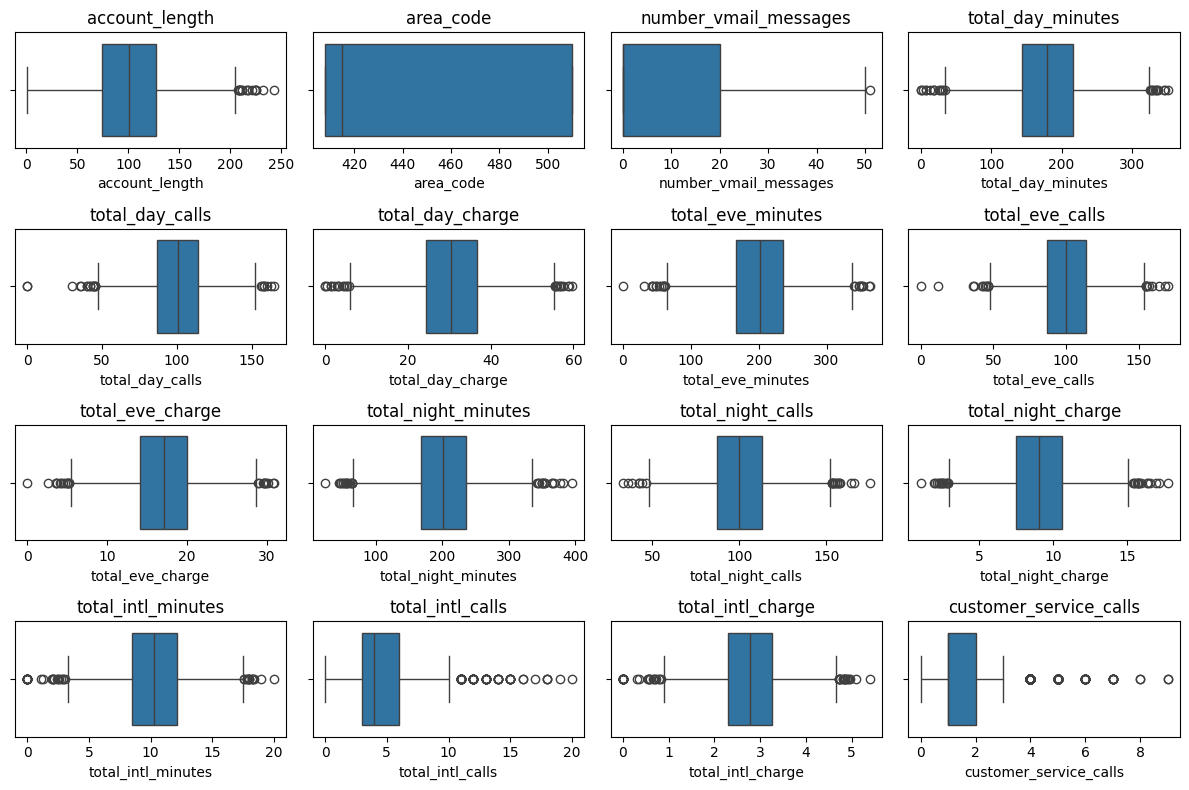

In [573]:
# Visualizing the summary statistics
# Retrieve numerical columns for visualization

numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Set the figure size
plt.figure(figsize=(12, 8))

# Create box plots for each numerical column
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

# Adjust subplot spacing
plt.tight_layout()

# Display the plot
plt.show()

The boxplots reveal that numerous columns contain significant numbers of outliers, which could present challenges for machine learning models. However, these outliers contain valuable insights crucial for our models. Therefore, this data won't be discarded, as it holds significant importance for our analysis.

### 4.2 Bivariate Analysis

Bivariate analysis involves examining the relationship or association between two variables in a dataset. It allows us to explore how changes in one variable are related to changes in another variable.

Bivariate analysis will be needed to be conducted so as to understand the relationship between various features (such as state, international plan, and voice mail plan) and the target variable, which is customer churn. By analyzing these relationships, we aim to identify correlations between categorical columns and the customer churn rate. This will help gain insights into how different factors may influence the likelihood of customers churning.

In [574]:
def plot_categorical_distribution(df, feature):
    """
    Plots the distribution of a categorical feature in the given DataFrame based on churn rate.
    """
    # Set the figure size
    plt.figure(figsize=(10, 5))

    # Calculate the sum of churn for each category of the feature and sort in descending order
    churn_counts = df.groupby(feature)["churn"].sum().sort_values(ascending=False)

    # Get the top 10 categories with the highest churn counts
    top_10_categories = churn_counts.head(10).index.tolist()

    # Create a bar plot of the feature, colored by churn
    sns.barplot(x=top_10_categories, y=churn_counts.loc[top_10_categories], color='skyblue')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Set the title and labels
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Churn Count', fontsize=12)

    # Display the plot
    plt.show()

- State

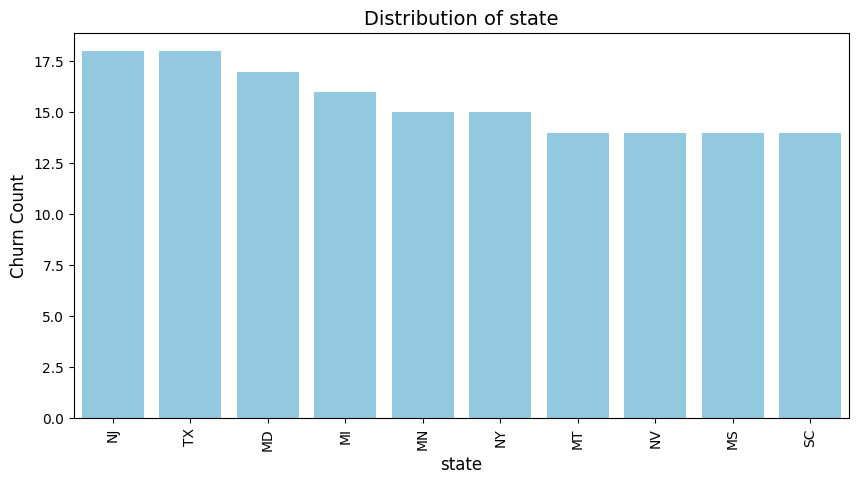

In [575]:
plot_categorical_distribution(df, 'state')

The majority of churned customers are from New Jersey, Texas, Maryland, Miami, and New York.

- International Plan

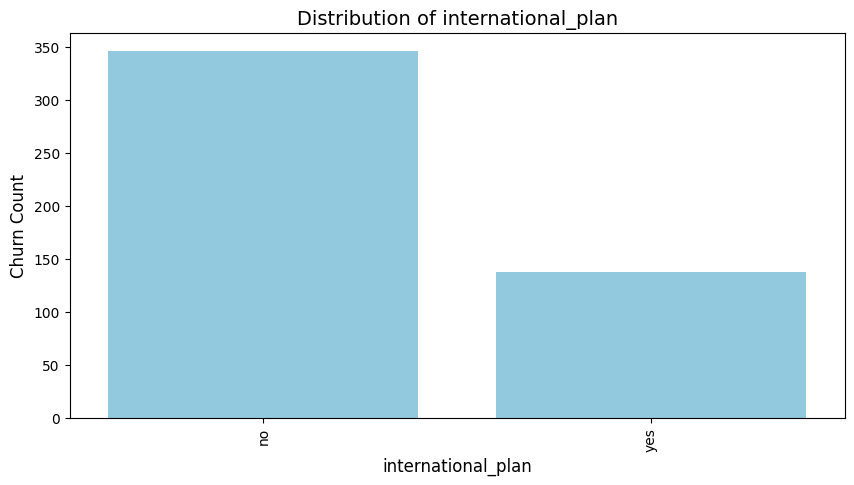

In [576]:
plot_categorical_distribution(df, 'international_plan')

For the international plan, there's a significant difference in churn rates between subscribers and non-subscribers. This suggests a possible link between opting for the international plan and a higher likelihood of churning. These findings imply potential issues with international plans that might lead to customer dissatisfaction. Additionally, it's noteworthy that most churned customers didn't have an international plan.

- Voicemail Plan

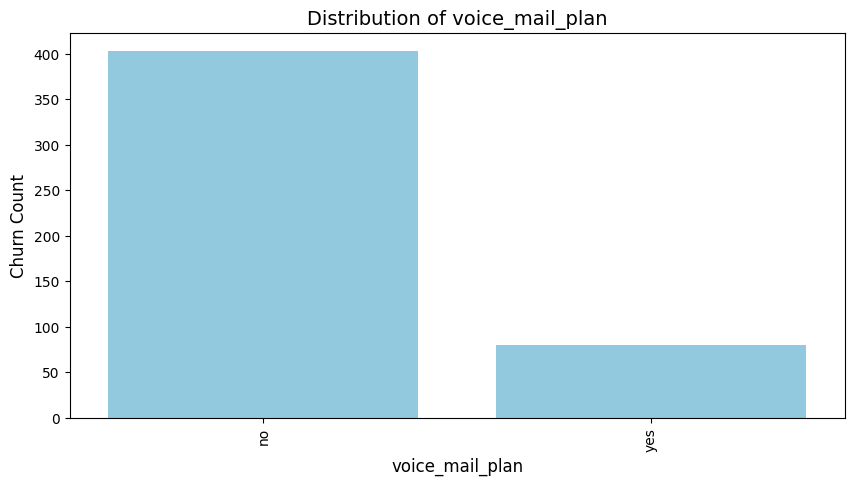

In [577]:
plot_categorical_distribution(df, 'voice_mail_plan')

In the case of the voice mail plan, there's a notable difference in churn rates between customers and those who didn't. This discrepancy implies a potential correlation between subscribing to the voice mail plan and a reduced probability of churning.

The majority of customers who churned did not have an voicemail plan.

### 4.2 Multi-variate Analysis

Multivariate analysis entails investigating the interplay among multiple variables concurrently, with a particular focus on their correlation with the target variable, customer churn. Through the utilization of a correlation matrix, we can discern the associations among various variables within the dataset.

#### 4.2.1 Correlation matrix

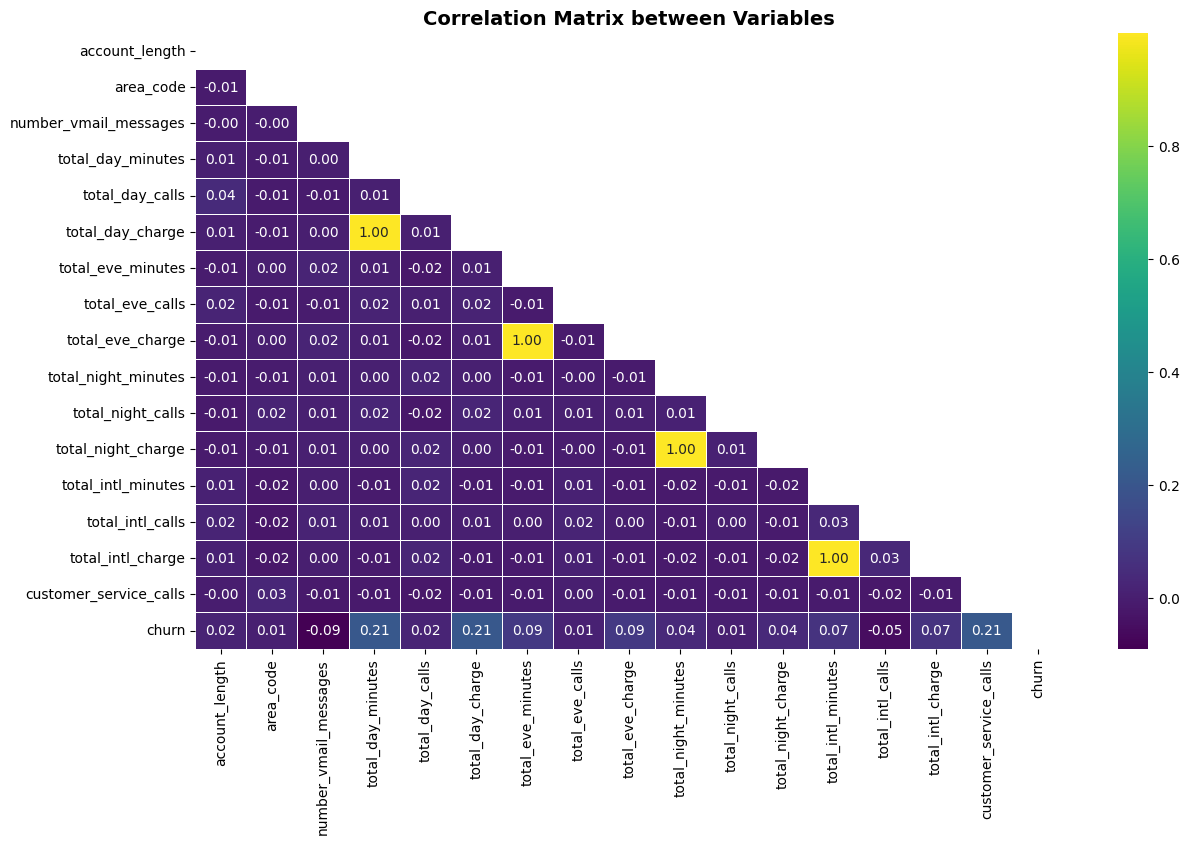

In [578]:
def plot_correlation_matrix(df):

    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Set the figure size
    plt.figure(figsize=(14, 8))

    # Generate the correlation heatmap for the lower half
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)

    # Set the title of the plot
    plt.title('Correlation Matrix between Variables', fontsize=14, fontweight='bold')

    # Display the plot
    plt.show()

# Call the function to plot the lower half of the correlation matrix
plot_correlation_matrix(df)



In our multivariate analysis, we observed a generally low correlation between most features within the dataset. However, several pairs of features exhibited a perfect positive correlation, including:
- total evening charge and total evening minutes, 
- total day charge and total day minutes, 
- total night charge and total night minutes,
- total international charge and total international minutes. 

This perfect correlation was expected, given that the charge for a call is directly dependent on its duration. To mitigate multicollinearity concerns, one variable from each correlated pair needs to be dropped. Additionally, certain features like total day minutes, total day charge, and customer service calls displayed a weak positive correlation with churn, while others showed negligible correlation with churn. 

These findings underscore the need for careful consideration of feature selection to avoid multicollinearity issues and highlight the importance of multivariate analysis in understanding the intricate relationships between multiple variables and the target variable, customer churn.

#### 4.2.2 Multicollinearity

To address multicollinearity concerns there is need to identify highly correlated variables within the dataset to decide which ones to exclude, thereby circumventing problems like instability, overfitting, or imprecise coefficient estimates during model building. 

This evaluation is typically conducted through the examination of a correlation matrix, where multicollinearity manifests when two or more features exhibit strong correlations, often surpassing a threshold value of 0.9. Consequently, in the analysis, features exceeding this correlation threshold will be omitted to address multicollinearity effectively and uphold the model's robustness and reliability.

In [579]:
def get_high_correlations(df, threshold=0.75):
    
    # Calculate the absolute correlation matrix and stack it
    stacked_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

    # Create a new column 'pairs' with tuples of variable names
    stacked_corr['pairs'] = list(zip(stacked_corr.level_0, stacked_corr.level_1))

    # Set 'pairs' as the index and drop the original variable name columns
    stacked_corr.set_index(['pairs'], inplace=True)
    stacked_corr.drop(columns=['level_0', 'level_1'], inplace=True)

    # Rename the correlation column as 'cc'
    stacked_corr.columns = ['cc']

    # Drop duplicates and select pairs with correlation higher than the threshold
    high_corr = stacked_corr[(stacked_corr.cc > threshold) & (stacked_corr.cc < 1)]

    return high_corr

# Call the function to get pairs of variables with high correlation
high_correlations = get_high_correlations(df)
high_correlations


,cc
pairs,
"(total_day_charge, total_day_minutes)",1.000000
"(total_day_minutes, total_day_charge)",1.000000
"(total_eve_minutes, total_eve_charge)",1.000000
"(total_eve_charge, total_eve_minutes)",1.000000
"(total_night_minutes, total_night_charge)",0.999999
"(total_night_charge, total_night_minutes)",0.999999
"(total_intl_charge, total_intl_minutes)",0.999993
"(total_intl_minutes, total_intl_charge)",0.999993


The variables (total day charge, total day minutes), (total eve minutes, total eve charge), (total night minutes, total night charge), and (total intl charge, total intl minutes) exhibit high correlation with each other. Therefore, for each pair, we will drop one variable to address this correlation.

In [580]:
def drop_multicollinear_features(df, features_to_drop):
    """
    Drops specified features from the DataFrame to prevent multicollinearity.
    """
    # Drop the specified features
    df.drop(features_to_drop, axis=1, inplace=True)

    return df

# Define the features to drop
features_to_drop = ['total_day_charge', 'total_eve_minutes', 'total_night_charge','total_intl_minutes']

# Call the function to drop the features
df = drop_multicollinear_features(df, features_to_drop)

# Display the remaining columns
df.columns


Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn'],
      dtype='object')

#### Feature Engineering

Feature engineering involves the conversion of raw data into features that more accurately reflect the underlying problem for predictive models. This enhances the model's accuracy when dealing with new, unseen data. During this stage, we will undertake tasks such as Label Encoding, One Hot Encoding, and Scaling the data.

##### Label Encoding

Label encoding is a process in which categorical variables are transformed into numerical format. Each category is assigned a unique numerical label, typically starting from 0 or 1 and increasing sequentially. This conversion allows machine learning algorithms to interpret categorical data as numerical data, facilitating model training and analysis.

In [581]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to convert
categorical_cols = ['state', 'international_plan', 'voice_mail_plan']

# Convert each categorical column to numerical
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

##### One Hot Encoding

One hot encoding is a technique used to convert categorical variables into a binary format, where each category is represented by a binary vector. In this encoding scheme, each category is transformed into a binary vector of length equal to the number of unique categories in the variable. The vector has a value of 1 in the position corresponding to the category and 0 in all other positions. This encoding preserves the categorical information without imposing any ordinal relationship between categories, making it suitable for machine learning algorithms that require numerical input.

In [582]:
import pandas as pd

def apply_one_hot_encoding(df, columns):
    """
        Applies one-hot encoding to the specified columns in the DataFrame.
    """
    # Apply one-hot encoding to the specified columns
    df = pd.get_dummies(df, columns=columns)

    return df

# Define the columns to apply one-hot encoding to
columns_to_encode = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

# Call the function to apply one-hot encoding
df = apply_one_hot_encoding(df, columns_to_encode)

# Display the first few rows of the DataFrame
df.head()


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_calls,total_intl_charge,...,state_48,state_49,state_50,area_code_408,area_code_415,area_code_510,international_plan_0,international_plan_1,voice_mail_plan_0,voice_mail_plan_1
0,128,25,265.1,110,99,16.78,244.7,91,3,2.70,...,0,0,0,0,1,0,1,0,0,1
1,107,26,161.6,123,103,16.62,254.4,103,3,3.70,...,0,0,0,0,1,0,1,0,0,1
2,137,0,243.4,114,110,10.30,162.6,104,5,3.29,...,0,0,0,0,1,0,1,0,1,0
3,84,0,299.4,71,88,5.26,196.9,89,7,1.78,...,0,0,0,1,0,0,0,1,1,0
4,75,0,166.7,113,122,12.61,186.9,121,3,2.73,...,0,0,0,0,1,0,0,1,1,0


##### Scaling the data

Scaling the data is a crucial preprocessing step to ensure that all features have a similar scale. This is particularly important for machine learning algorithms that rely on distance calculations, such as K-nearest neighbors or support vector machines.

In [585]:
import numpy as np

def scale_numerical_features(df):
    """
    Scales numerical features in the DataFrame using MinMaxScaler.
    """
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Define function for scaling a column
    def scale_column(column):
        return scaler.fit_transform(df[[column]])

    # Iterate through numerical columns and scale them
    for column in df.select_dtypes(include=[np.number]).columns:
        df[[column]] = scale_column(column)

    return df

# Call the function to scale the numerical features
df = scale_numerical_features(df)

# Display the first few rows of the DataFrame
df.head()


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_calls,total_intl_charge,...,state_48,state_49,state_50,area_code_408,area_code_415,area_code_510,international_plan_0,international_plan_1,voice_mail_plan_0,voice_mail_plan_1
0,0.524793,0.490196,0.755701,0.666667,0.582353,0.542866,0.595750,0.408451,0.15,0.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.438017,0.509804,0.460661,0.745455,0.605882,0.537690,0.621840,0.492958,0.15,0.685185,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.561983,0.000000,0.693843,0.690909,0.647059,0.333225,0.374933,0.500000,0.25,0.609259,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.342975,0.000000,0.853478,0.430303,0.517647,0.170171,0.467187,0.394366,0.35,0.329630,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.305785,0.000000,0.475200,0.684848,0.717647,0.407959,0.440290,0.619718,0.15,0.505556,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


##### Train-test-split data

The training set serves as the data used to instruct the machine learning model, allowing it to discern the underlying patterns and relationships within the dataset. This portion typically comprises the largest proportion, typically ranging from 70% to 80% of the entire dataset.

In [591]:
# Separating features from the target variable
# Define the target variable and the feature matrix
y = df['churn']  
X = df.drop('churn', axis=1)  

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Train set size: 2666
Test set size: 667


##### Applying SMOTE to Resolve Unbalanced 'churn' Feature

Synthetic Minority Oversampling Technique ("SMOTE") is an oversampling technique where synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together. The technique aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [598]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now, X_train_smote and y_train_smote are the feature matrix and target variable of the oversampled training data
print("Shape of X_train_smote:", X_train_smote.shape)
print("\nValue counts of y_train_smote:\n", y_train_smote.value_counts())


Shape of X_train_smote: (4568, 69)

Value counts of y_train_smote:
 False    2284
True     2284
Name: churn, dtype: int64


 ## 5. Modeling

In the churn prediction project, a comprehensive journey is embarked upon to predict customer churn based on various dataset features. The approach involves creating multiple models, rigorously evaluating their performance, and fine-tuning hyperparameters to enhance model efficacy. 

Throughout this process, the primary objective is to identify the optimal model and parameter configurations that yield the highest predictive accuracy. Specifically, the recall score metric is prioritized, aiming for a threshold of 80% or higher to signify a successful model. 

By iteratively refining the models and techniques, the aim is to build a robust predictive framework capable of effectively identifying potential churners and informing strategic business decisions.

In order to achieve the targets stipulated in the project proposal, the following algorithms will be used:

- Logistic Regression
- Decision Tree
- Random Forest
- XG Boost

The ROC_AUC metric will also evaluate the performance of the said models.

### 5.1 Logistic Regression

Logistic regression is a statistical technique commonly used for binary classification tasks. It is specifically designed for situations where the outcome variable is binary, taking only two possible values. 

The main objective of logistic regression is to estimate the probability of an observation belonging to a specific class, utilizing the values of independent variables as predictors.

In [611]:
# Construct a pipeline for preprocessing and logistic regression modeling
model_pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[('num', StandardScaler(), X.columns)])),
    ('classifier', LogisticRegression())
])

# Execute k-fold cross-validation on the training set
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=k_fold, scoring='accuracy')

# Display cross-validation scores and mean CV accuracy
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Train the model on the training data
model_pipeline.fit(X_train, y_train)

# Generate predictions for the train and test data
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Compute the accuracy of the model for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the train and test scores
print(f"\nTrain Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

Cross-validation scores: [0.8670412  0.86866792 0.83864916 0.85741088 0.89118199]
Mean CV accuracy: 0.8645902284433389

Train Accuracy: 0.87
Test Accuracy: 0.86

Classification Report (Test Data):
              precision    recall  f1-score   support

       False       0.87      0.97      0.92       566
        True       0.58      0.21      0.31       101

    accuracy                           0.86       667
   macro avg       0.73      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667



Model Accuracy Analysis: 

- The model's overall accuracy is 86%, performing slightly better on training data (87%) than test data (86%).

Model Evaluation Summary:

- Precision: Precision for class 0 (not churned) is 87%, while for class 1 (churned) it is 58%.
- Recall: Recall for class 0 (not churned) is 97%, whereas for class 1 (churned) it is merely 21%.
- F1-score: The F1-score for class 0 (not churned) reaches 92%, but for class 1 (churned) it is significantly lower at 31%, primarily due to the low recall.

Confusion matrix was further done to visualize the results.


Confusion Matrix (Test Data):
[[551  15]
 [ 80  21]]


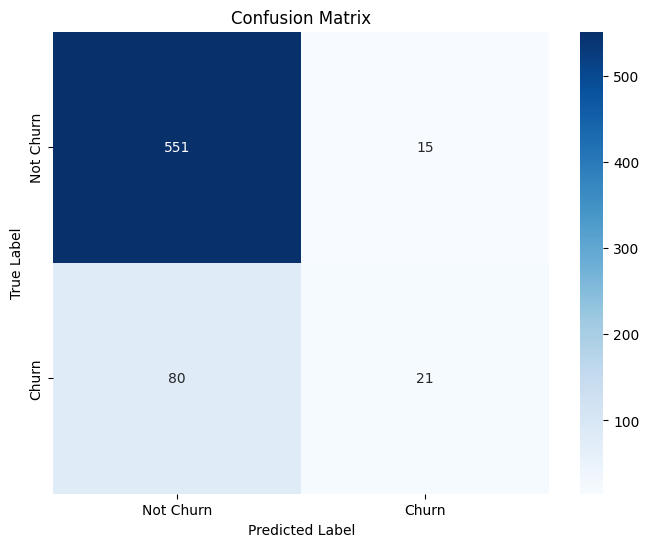

In [612]:
# Import necessary libraries
import seaborn as sns

# Compute the confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("\nConfusion Matrix (Test Data):")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix Analysis:

In the confusion matrix, there are a total of 667 samples in the test set.

- True Positives (TP): The model accurately predicted 21 samples as "Not churned" (class 0).
- True Negatives (TN): The model correctly identified 551 samples as "churned" (class 1).
- False Positives (FP): The model inaccurately classified 15 samples as "churned" when they were not churned.
- False Negatives (FN): The model misclassified 80 samples as "not churned" when they were indeed churned.

According to the model,total day charge, customer service calls,total eve charge are the top three most important features.

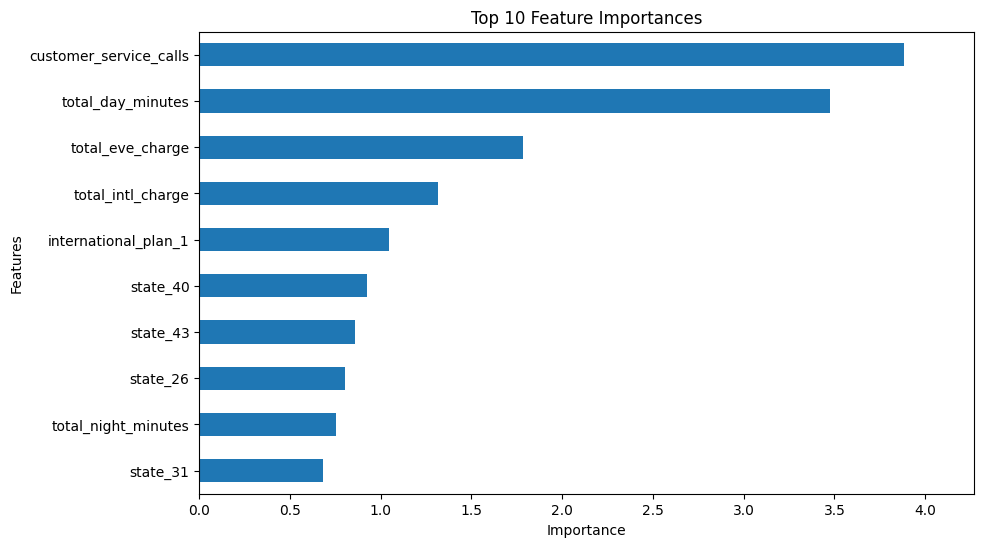

In [613]:
# Instantiate and fit the logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Retrieve coefficients
coefficients = logistic_regression_model.coef_[0]

# Extract feature importances
feature_names = X_train.columns
feature_importances = pd.Series(coefficients, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features) * 1.1)
plt.show()


In [621]:
# Create a DataFrame from the feature importances Series
coefficients_df = pd.DataFrame(feature_importances, columns=['Coefficient'])

# Sort the DataFrame by coefficient value in descending order
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Display the top ten coefficients
top_ten_coefficients = coefficients_df.head(10)
top_ten_coefficients


,Coefficient
customer_service_calls,3.882695
total_day_minutes,3.478546
total_eve_charge,1.785265
total_intl_charge,1.317319
international_plan_1,1.043571
state_40,0.924180
state_43,0.856860
state_26,0.800965
total_night_minutes,0.754757
state_31,0.682801


A positive coefficient indicates a feature that increases the chance of a customer leaving (churning). On the other hand, a negative coefficient indicates a feature that reduces the likelihood of churn. By understanding these relationships, we can identify the most important factors influencing customer churn.

This knowledge empowers us to take proactive steps to prevent churn and maintain valuable customer relationships.
- Customer_service_calls: This feature has the highest positive impact on churn. An increase in the number of customer service calls is associated with a higher likelihood of churn.

- Total_day_charge and total_day_minutes: Both features have a positive impact on churn. An increase in total day charge or total day minutes is associated with a higher likelihood of churn.

- Total_eve_charge, total_intl_minutes, total_night_minutes, and total_night_charge: These features also have a positive impact on churn. An increase in the respective charges and minutes is associated with a higher likelihood of churn.

- Total_eve_minutes and total_intl_charge: These features have a positive impact on churn. An increase in total evening minutes or total international charge is associated with a higher likelihood of churn.

- International_plan_yes and international_plan_no: Similar to the voice mail plan features, international_plan_yes has a positive impact on churn, meaning customers with an international plan are more likely to churn, while international_plan_no has a negative impact, meaning customers without an international plan are less likely to churn.

### 5.2 Decision Tree Classifier

The Decision Tree Classifier is a type of supervised machine learning algorithm utilized for data classification tasks. Operating on the principle of recursively partitioning the dataset into increasingly refined subsets, it aims to isolate individual classes within each subset. When presented with new data, the classifier navigates the tree structure, tracing the path dictated by the feature values to predict its class.

In [622]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
# Define the parameter grid
param_grid = {
    'max_depth': range(1,11),
    'min_samples_split': range(2, 21, 2),
    'min_samples_leaf': range(1, 21, 2),
}

# Initialize the classifier
clf = DecisionTreeClassifier()

# Initialize a scorer for the grid search
scorer = make_scorer(accuracy_score)

# Initialize the grid search
grid_obj = GridSearchCV(clf, param_grid, scoring=scorer, cv=5)

# Fit the grid search object to the data
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf1 = grid_obj.best_estimator_

# Fit the best algorithm to the data
clf1.fit(X_train, y_train)

predictions = clf1.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,predictions))

# After fitting the grid search object to the data
print('Best Parameters: ', grid_obj.best_params_)
print('Best Score: ', grid_obj.best_score_)

# Make predictions on the test set
predictions = clf1.predict(X_test)

# Calculate and print the metrics
print('Accuracy: ', accuracy_score(y_test,predictions))
print('Precision: ', precision_score(y_test,predictions))
print('Recall: ', recall_score(y_test,predictions))
print('F1 Score: ', f1_score(y_test,predictions))

#Calculate train and test scores
train_score = clf1.score(X_train, y_train)
test_score = clf1.score(X_test, y_test)

print('train score ', train_score)
print('test score ', test_score)

Accuracy:  0.9460269865067467
Best Parameters:  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}
Best Score:  0.94111136876278
Accuracy:  0.9460269865067467
Precision:  0.922077922077922
Recall:  0.7029702970297029
F1 Score:  0.797752808988764
train score  0.9639909977494373
test score  0.9460269865067467


In [625]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform k-fold cross-validation on the classifier
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X_train, y_train, cv=k_fold, scoring='accuracy')

# Print cross-validation scores and mean CV accuracy
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
predictions = clf.predict(X_test)

# Print the accuracy of the predictions
print('\nClassifier Evaluation:')
print('Accuracy: ', accuracy_score(y_test, predictions))

# Print the classification report
print(classification_report(y_test, predictions))

# Calculate train and test scores
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Train Score: ', train_score)
print('Test Score: ', test_score)


Cross-validation scores: [0.92696629 0.91369606 0.91181989 0.91181989 0.92307692]
Mean CV accuracy: 0.917475810021713

Classifier Evaluation:
Accuracy:  0.9340329835082459
              precision    recall  f1-score   support

       False       0.96      0.97      0.96       566
        True       0.80      0.75      0.78       101

    accuracy                           0.93       667
   macro avg       0.88      0.86      0.87       667
weighted avg       0.93      0.93      0.93       667

Train Score:  1.0
Test Score:  0.9340329835082459


In [626]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 21, 2),
    'min_samples_leaf': range(1, 21, 2),
}

# Initialize the classifier
clf = DecisionTreeClassifier()

# Initialize a scorer for the grid search
scorer = make_scorer(accuracy_score)

# Initialize the grid search
grid_obj = GridSearchCV(clf, param_grid, scoring=scorer, cv=5)

# Fit the grid search object to the data
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf1 = grid_obj.best_estimator_

# Fit the best algorithm to the data
clf1.fit(X_train, y_train)

# Make predictions on the test set
predictions = clf1.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions))

# After fitting the grid search object to the data
print('Best Parameters: ', grid_obj.best_params_)
print('Best Score: ', grid_obj.best_score_)

# Make predictions on the test set
predictions = clf1.predict(X_test)

# Calculate and print the metrics
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions))
print('Recall: ', recall_score(y_test, predictions))
print('F1 Score: ', f1_score(y_test, predictions))

# Calculate train and test scores
train_score = clf1.score(X_train, y_train)
test_score = clf1.score(X_test, y_test)

print('Train score ', train_score)
print('Test score ', test_score)


Accuracy:  0.9475262368815592
Best Parameters:  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}
Best Score:  0.9411120714491501
Accuracy:  0.9475262368815592
Precision:  0.9230769230769231
Recall:  0.7128712871287128
F1 Score:  0.8044692737430168
Train score  0.9639909977494373
Test score  0.9475262368815592


In [623]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Define the parameter grid
param_grid = {
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 21, 2),
    'min_samples_leaf': range(1, 21, 2),
}

# Create a decision tree classifier
tree_classifier = DecisionTreeClassifier()

# Define a scorer for accuracy
accuracy_scorer = make_scorer(accuracy_score)

# Initialize a grid search with cross-validation
grid_search = GridSearchCV(tree_classifier, param_grid, scoring=accuracy_scorer, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Fit the best estimator to the training data
best_estimator.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = best_estimator.predict(X_test)

# Calculate accuracy and other metrics
test_accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print model evaluation metrics
print('Test Accuracy: ', test_accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)

# Calculate and print train and test scores
train_score = best_estimator.score(X_train, y_train)
test_score = best_estimator.score(X_test, y_test)
print('Train Score: ', train_score)
print('Test Score: ', test_score)


Test Accuracy:  0.9460269865067467
Precision:  0.922077922077922
Recall:  0.7029702970297029
F1 Score:  0.797752808988764
Train Score:  0.9628657164291072
Test Score:  0.9460269865067467


In [624]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': range(1,11,2),  # consider fewer options
    'min_samples_split': range(2, 21, 4),
    'min_samples_leaf': range(1, 21, 4),
}

# Initialize the classifier
clf = DecisionTreeClassifier()

# Initialize a scorer for the grid search
scorer = make_scorer(accuracy_score)

# Initialize the grid search
grid_obj = RandomizedSearchCV(clf, param_grid, scoring=scorer, cv=5, n_jobs=-1, n_iter=10)

# Fit the grid search object to the data
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf1 = grid_obj.best_estimator_

# Fit the best algorithm to the data
clf1.fit(X_train, y_train)

# Make predictions on the test set
predictions = clf1.predict(X_test)

# Calculate and print the metrics
print('Accuracy: ', accuracy_score(y_test,predictions))
print('Precision: ', precision_score(y_test,predictions))
print('Recall: ', recall_score(y_test,predictions))
print('F1 Score: ', f1_score(y_test,predictions))

# Calculate train and test scores
train_score = clf1.score(X_train, y_train)
test_score = clf1.score(X_test, y_test)

print('Train Score: ', train_score)
print('Test Score: ', test_score)


Accuracy:  0.9370314842578711
Precision:  0.8933333333333333
Recall:  0.6633663366336634
F1 Score:  0.7613636363636364
Train Score:  0.959489872468117
Test Score:  0.9370314842578711


In [ ]:
#Instantiate DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=123)

In [ ]:
#Fit on the training data
dt_clf.fit(resampled_X_train,resampled_y_train)

#predict on the test set
y_pred_dt = dt_clf.predict(X_test)

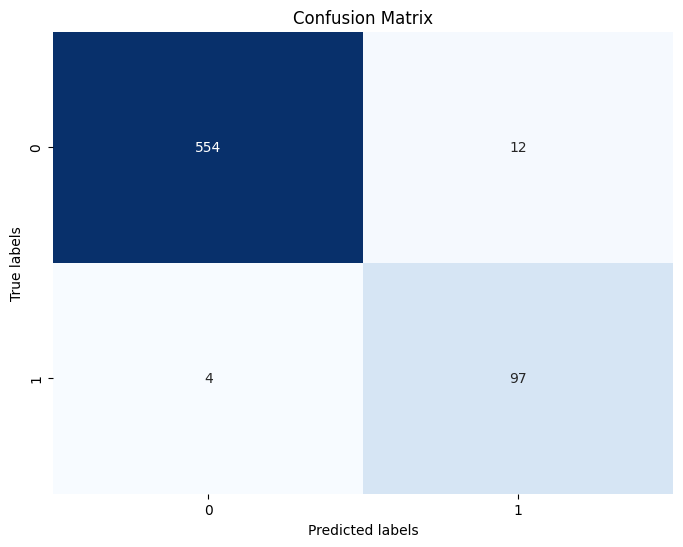

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred_dt are already defined
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

       False       0.99      0.98      0.99       566
        True       0.89      0.96      0.92       101

    accuracy                           0.98       667
   macro avg       0.94      0.97      0.95       667
weighted avg       0.98      0.98      0.98       667



In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(dt_clf, feature_names=resampled_X_train.columns, class_names=["Not Churn", "Churn"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


KeyboardInterrupt: 

In [ ]:
from sklearn.tree import export_text

# Generate the text representation of the decision tree
text_representation = export_text(dt_clf, feature_names=resampled_X_train.columns)
print(text_representation)


|--- total_day_minutes <= 0.66
|   |--- customer_service_calls <= 0.33
|   |   |--- international_plan_no <= 0.99
|   |   |   |--- total_intl_calls <= 0.15
|   |   |   |   |--- class: 1.0
|   |   |   |--- total_intl_calls >  0.15
|   |   |   |   |--- total_intl_charge <= 0.65
|   |   |   |   |   |--- state_KS <= 0.11
|   |   |   |   |   |   |--- customer_service_calls <= 0.22
|   |   |   |   |   |   |   |--- international_plan_no <= 0.09
|   |   |   |   |   |   |   |   |--- state_AL <= 0.05
|   |   |   |   |   |   |   |   |   |--- total_eve_charge <= 0.68
|   |   |   |   |   |   |   |   |   |   |--- state_AZ <= 0.43
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- state_AZ >  0.43
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- total_eve_charge >  0.68
|   |   |   |   |   |   |   |   |   |   |--- state_MD <= 0.11
|   |   |   |   |   |   |   |   

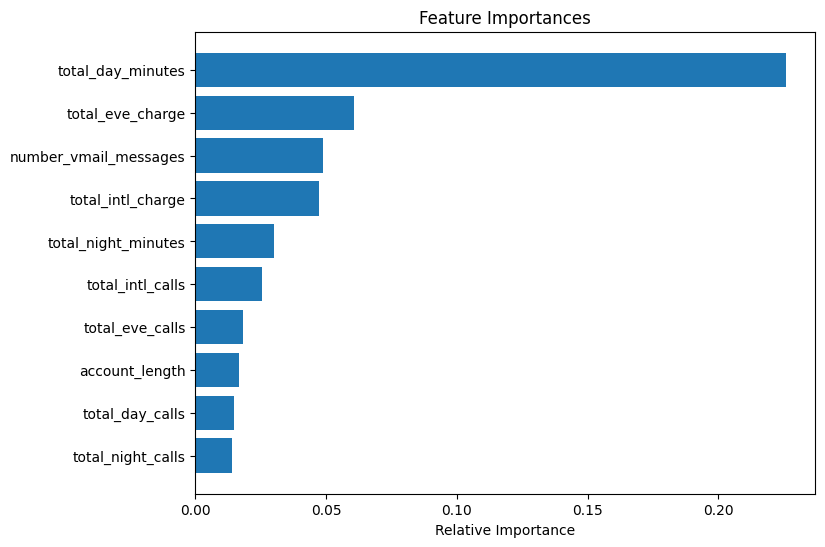

In [ ]:
# Feature Importances
feature_names = list(resampled_X_train.columns)
importances = dt_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Random Forest Classifier

It's a technique in ensemble learning used for classification, regression, and various tasks. During training, it creates numerous decision trees and derives a prediction or regression value by averaging the outputs of these individual trees.

In [ ]:
#Instantiate the classifier
rf_clf= RandomForestClassifier(random_state=123)

#Fit on the training data
rf_clf.fit(resampled_X_train,resampled_y_train)

RandomForestClassifier(random_state=123)

In [ ]:
#predict on the test data
y_pred_rf = rf_clf.predict(X_test)

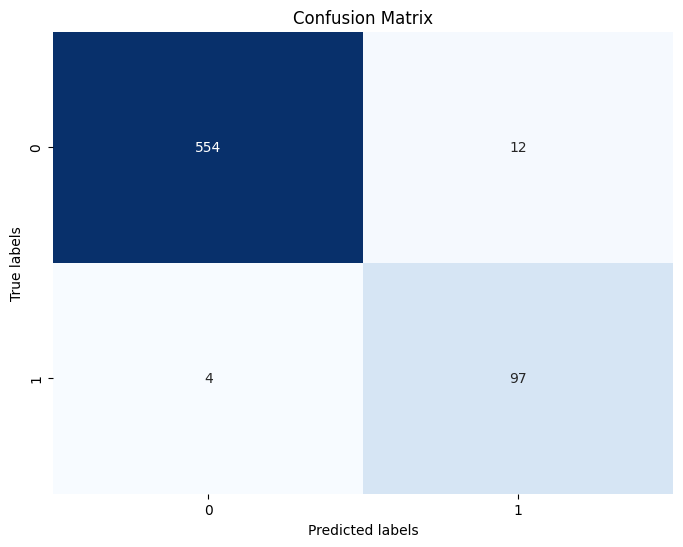

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred_dt are already defined
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       566
         1.0       0.93      0.96      0.95       101

    accuracy                           0.98       667
   macro avg       0.96      0.97      0.97       667
weighted avg       0.98      0.98      0.98       667



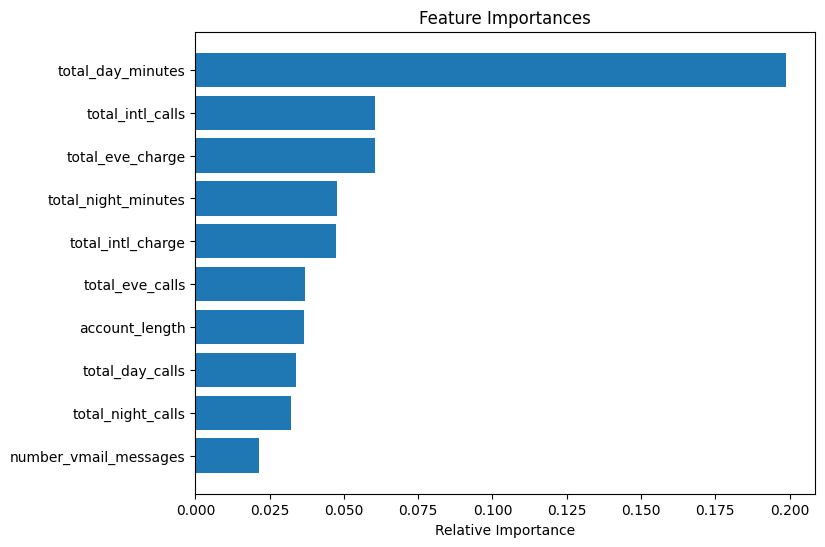

In [ ]:
feature_names = list(resampled_X_train.columns)
importances = rf_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The random forest classifier achieves a recall score of 0.74, a significant improvement over the prior model. This suggests that the model accurately identifies approximately 74% of positive instances.

Evaluation via the confusion matrix reveals a notable prevalence of true positives and true negatives compared to false positives and false negatives. This suggests the model's predictions are predominantly accurate and not prone to overfitting.

The model highlights total day charge, total intl calls, and total eve charge as its top three most influential features.

XGBoost

XGBoost, short for Extreme Gradient Boosting, stands out as a robust machine learning algorithm suitable for both regression and classification tasks. Leveraging gradient boosting and ensemble learning methodologies, it merges numerous weak models, often decision trees, to form a potent predictive model.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#instantiate XGBClassifier
xg_clf = XGBClassifier(random_state=123)

#Fit on the training data
xg_clf.fit(resampled_X_train,resampled_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [ ]:
#predict on the test data
y_pred_xg = xg_clf.predict(X_test)

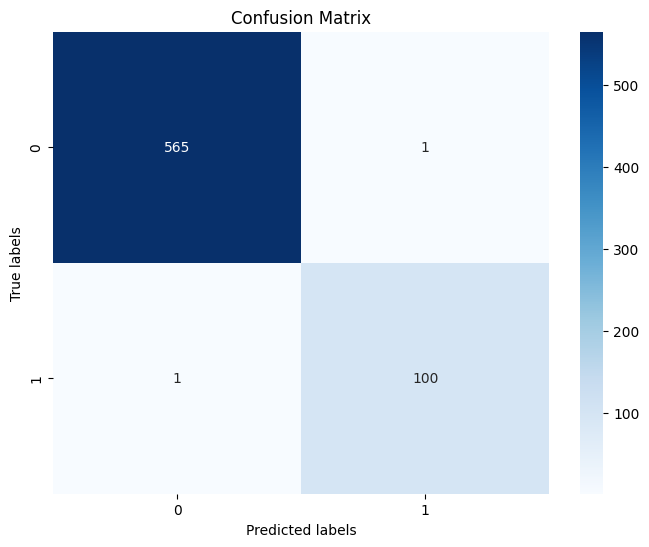

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming xg_clf is your trained XGBoost model
y_pred_xg = xg_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xg)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       566
         1.0       0.99      0.99      0.99       101

    accuracy                           1.00       667
   macro avg       0.99      0.99      0.99       667
weighted avg       1.00      1.00      1.00       667



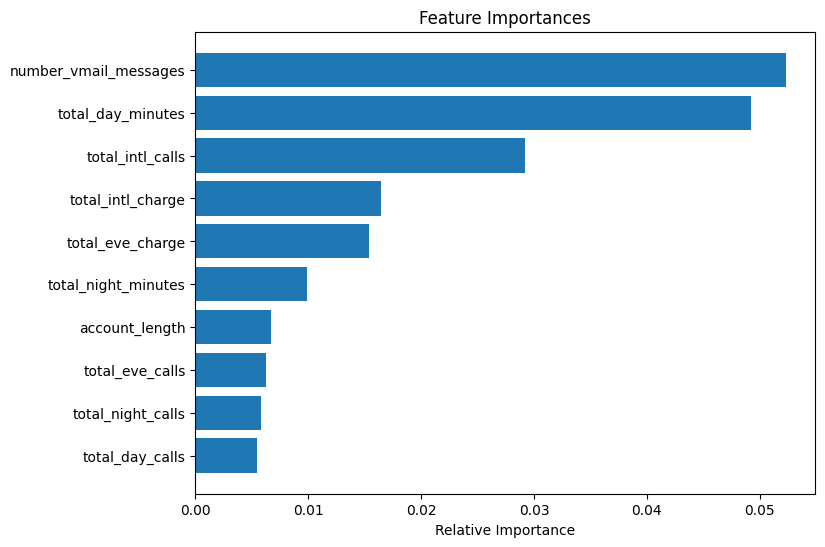

In [ ]:
feature_names = list(resampled_X_train.columns)
importances = xg_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The XGBoost classifier exhibits a recall score of 0.77, surpassing all prior models. This indicates its ability to correctly identify approximately 77% of positive instances.

In the evaluation using the confusion matrix, the model displays a higher count of true positives and true negatives compared to false positives and false negatives. This suggests the model's accuracy in predictions outweighs its inaccuracies, signifying it's not overfitting.

The model highlights total day charge, total international calls, and number of voicemail messages as the top three most significant features.

6. Model Evaluation

During this stage, we'll assess models using recall scores and ROC_AUC. Following that, we'll select the top two models to fine-tune them for improved performance.

6.1 Model Comparison - Recall Score

The recall score quantifies the proportion of actual positive instances that the model correctly identifies. A higher recall score suggests that the model is more adept at correctly recognizing positive instances.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Assuming you have your data loaded into X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
logistic_reg = LogisticRegression()
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()
xgboost = XGBClassifier()

# Train and evaluate each classifier
classifiers = [logistic_reg, random_forest, decision_tree, xgboost]
classifier_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost']

recall_scores = []

for clf, name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Classifier': classifier_names, 'Recall Score': recall_scores})

print(results_df)


            Classifier  Recall Score
0  Logistic Regression      0.168317
1        Random Forest      0.594059
2        Decision Tree      0.722772
3              XGBoost      0.772277


In [ ]:
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier()
}

# Assuming you have X and y defined already
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the models and record the results
results = {}

for clf_name, clf in classifiers.items():
    model = clf.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    recall = recall_score(y_test, y_pred)
    results[clf_name] = recall

# Print the recall scores
for clf_name, recall in results.items():
    print(f"{clf_name}: {recall}")


Logistic Regression: 0.2079207920792079
Random Forest: 0.5643564356435643
Decision Tree: 0.7425742574257426
XGBoost: 0.7722772277227723


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler

# Initialize the classifiers
lg = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
xgb = XGBClassifier()

classifiers = [lg, rf, dt, xgb]
names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost']

# Fit and transform the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(resampled_X_train)
X_test_scaled = scaler.transform(X_test)

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Loop through each classifier, fit, predict, and record the recall score
for clf, name in zip(classifiers, names):
    clf.fit(X_train_scaled, resampled_y_train)
    y_pred = clf.predict(X_test_scaled)
    recall = recall_score(y_test, y_pred)
    result_table = result_table.append({'classifiers': name,
                                        'recall': recall}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

result_table


,recall
classifiers,
Logistic Regression,0.811881
Random Forest,0.970297
Decision Tree,0.970297
XGBoost,0.990099


The outcomes table indicates that the XGBoostClassifier achieves the highest recall score, succeeded by the DecisionTreeClassifier and RandomForestClassifier. The LogisticRegression exhibits the lowest recall score of 0.82.

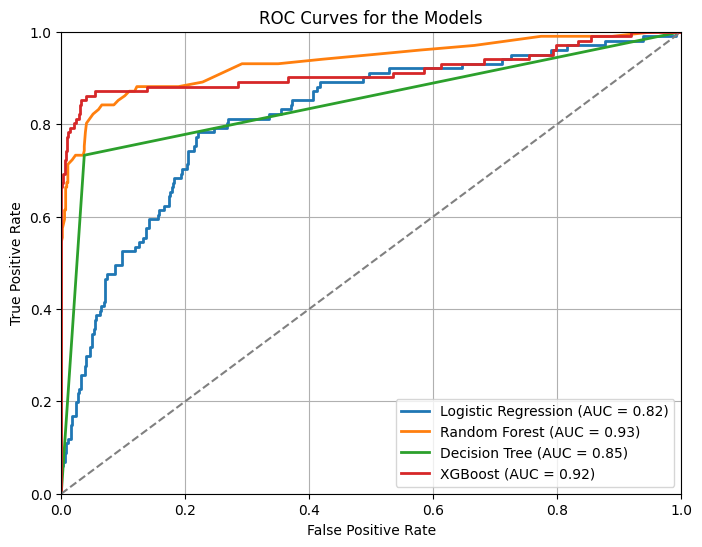

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Initialize the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier()
}

# Assuming you have X and y defined already
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(8, 6))

# Loop through each classifier, fit, predict, and plot the ROC curve
for clf_name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{clf_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for the Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


6.2 Models Comparison - ROC Curve

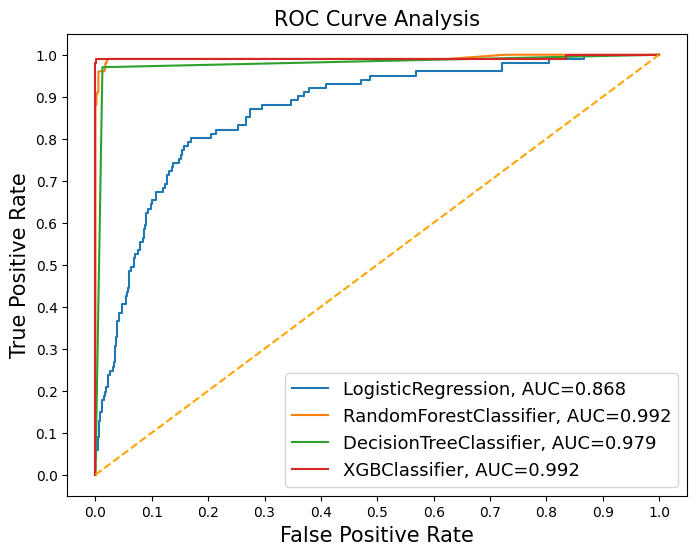

In [ ]:
np.random.seed(123)
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               XGBClassifier()]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

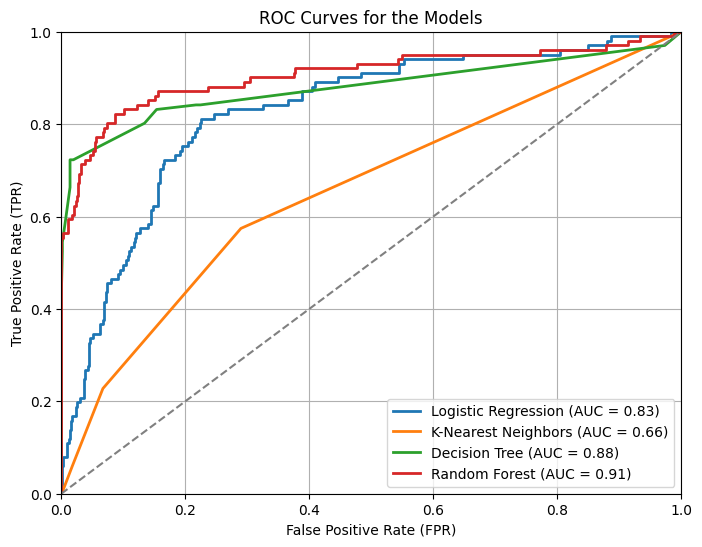

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifiers
lg = LogisticRegression(class_weight='balanced')
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

classifiers = [lg, knn, dt, rf]
names = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest']

# Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(8, 6))

# Loop through each classifier and plot its ROC curve
for clf, name in zip(classifiers, names):
    clf.fit(X_train_scaled, y_train)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for the Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression',
                                          'K-Nearest Neighbors Classifier',
                                          'Decision Trees Classifier',
                                          'Random Forest Classifier'],
                                 'Accuracy (Test Set)':[0.78,0.88,0.95,0.94],
                                 'F1 Score (Test Set)':[0.51,0.41,0.81,0.80],
                                 'Recall (Test Set)':[0.77,0.28,0.73,0.69],
                                 'Precision (Test Set)':[0.39,0.80,0.90,0.96]})

comparison_frame.style.highlight_max(color = 'lightgreen', axis = 0)

,Model,Accuracy (Test Set),F1 Score (Test Set),Recall (Test Set),Precision (Test Set)
0,Logistic Regression,0.780000,0.510000,0.770000,0.390000
1,K-Nearest Neighbors Classifier,0.880000,0.410000,0.280000,0.800000
2,Decision Trees Classifier,0.950000,0.810000,0.730000,0.900000
3,Random Forest Classifier,0.940000,0.800000,0.690000,0.960000


6.3 Model Tuning

After assessing the models using recall scores and ROC AUC, it's evident that both the XGBoost classifier and the RandomForest classifier exhibit promising performance. To enhance their effectiveness further, fine-tuning via GridSearch can be employed.

6.3.1 Tuning Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    "max_depth": [8,15,20],
    "n_estimators":[500,1000],
    "min_samples_split":[5,10,15],
    "criterion":['entropy','gini']
}

# Create an instance of the RandomForest classifier
rf = RandomForestClassifier(random_state = 123)

# Create GridSearchCV object with the defined parameter grid and scoring metric
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=False)

# Fit the GridsearchCV object to the training data
grid_search.fit(resampled_X_train, resampled_y_train)

# Print the best parameters
print(grid_search.best_params_)


{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 1000}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    "max_depth": [8, 15, 20],
    "n_estimators": [500, 1000],
    "min_samples_split": [5, 10, 15],
    "criterion": ['entropy', 'gini']
}

# Create an instance of the RandomForest classifier
rf = RandomForestClassifier(random_state=123)

# Create GridSearchCV object with the defined parameter grid and scoring metric
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=False)

# Fit the GridsearchCV object to the training data
grid_search.fit(resampled_X_train, resampled_y_train)

# Print the best parameters
print(grid_search.best_params_)


KeyboardInterrupt: 

In [ ]:
# Create an instance of the RandomForest classifier with best params
rf_tuned = RandomForestClassifier(criterion = 'entropy',
                                  max_depth = 20,
                                  min_samples_split = 5,
                                  n_estimators = 1000,
                                  random_state=123)
#Fit the model on the training data
rf_tuned.fit(resampled_X_train, resampled_y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       n_estimators=1000, random_state=123)

In [ ]:
#Predict on the test data
y_pred_tuned = rf_tuned.predict(X_test)

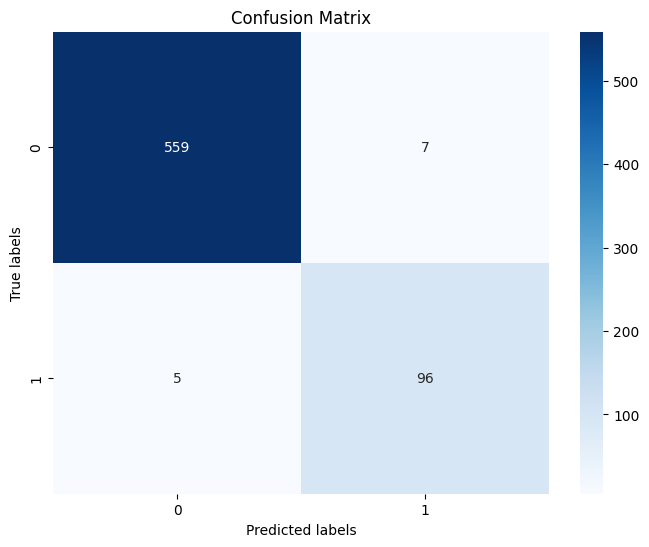

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test data
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#print the classification report
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       566
         1.0       0.93      0.95      0.94       101

    accuracy                           0.98       667
   macro avg       0.96      0.97      0.97       667
weighted avg       0.98      0.98      0.98       667



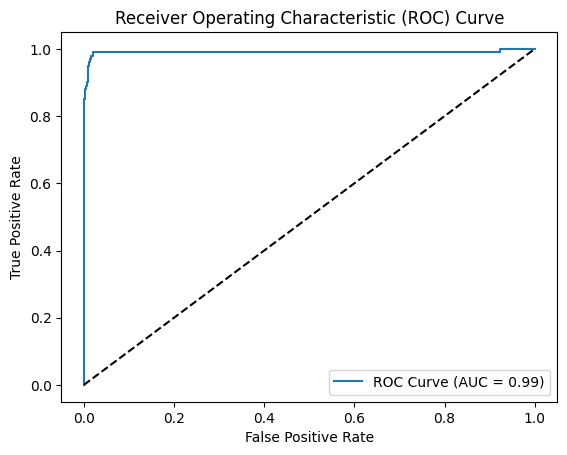

In [ ]:
# Get the predicted probabilities for the positive class
y_proba = rf_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Tuning XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Create an instance of Random Forest Classifier
rf = RandomForestClassifier(random_state=123)

# Create GridSearchCV object
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='recall', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(resampled_X_train, resampled_y_train)

# Print the best parameters
print(grid_search_rf.best_params_)


{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
#Create an instance of XGBoost Classifier with best params
xgb_tuned = XGBClassifier(learning_rate = 0.1,
                          max_depth = 10,
                          min_child_weight = 1,
                          n_estimators = 100,
                          subsample = 0.5,
                          random_state = 123)

#Fit on the training data
xgb_tuned.fit(resampled_X_train,resampled_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [ ]:
#Predict on the test data
y_pred_xgt = xgb_tuned.predict(X_test)

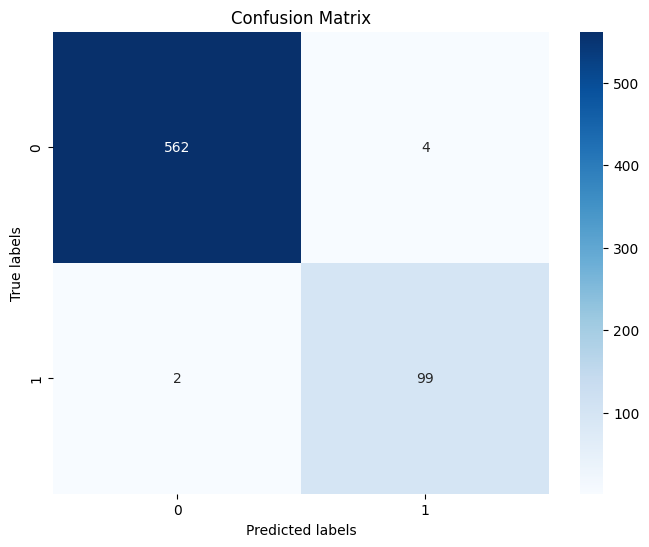

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test data
y_pred_xgt = xgb_tuned.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#Classification report
print(classification_report(y_test, y_pred_xgt))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       566
         1.0       0.96      0.98      0.97       101

    accuracy                           0.99       667
   macro avg       0.98      0.99      0.98       667
weighted avg       0.99      0.99      0.99       667



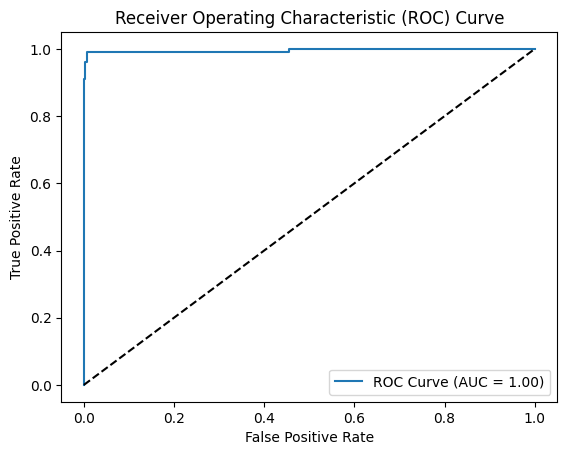

In [ ]:
# Get the predicted probabilities for the positive class
y_proba = xgb_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for XGB classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Needs altering
Based on the ROC curve and the recall metric, the tuned XGBoost model performs a bit better than RandomForest in distinguishing between positive and negative classes (churned and non-churned customers) and in correctly identifying churned customers.The model has a recall score of 0.79, which means model is able to capture 79% of the actual churned customers. This was so close to our target recall score of 0.8.

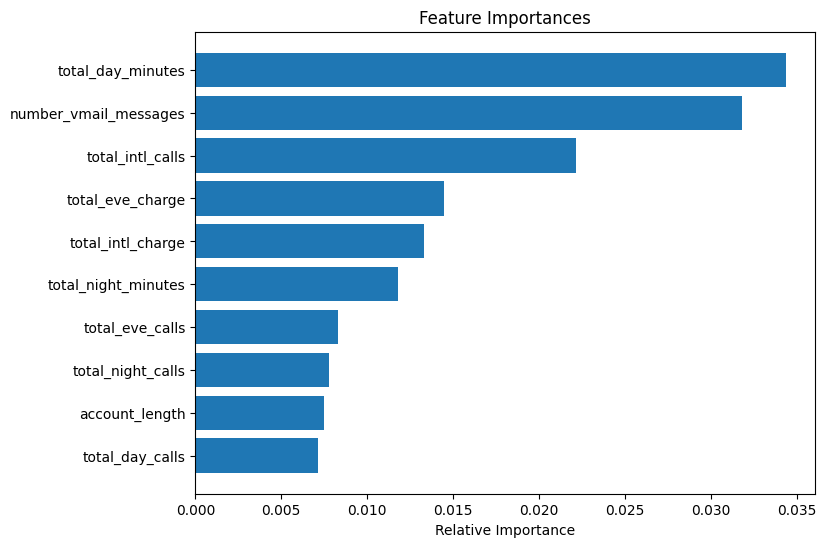

In [ ]:
feature_names = list(resampled_X_train.columns)
importances = xgb_tuned.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()